In [ ]:
# 1/16/2024

In [ ]:
# Autoregressive Models

year
1980-01-01     21
1981-01-01     33
1982-01-01     44
1983-01-01    140
1984-01-01     35
Name: cases, dtype: int64


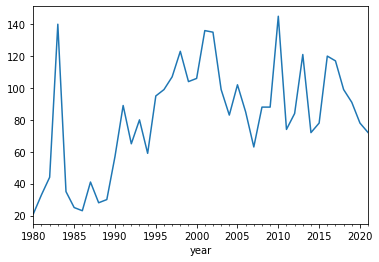

In [1]:
from pandas import read_csv
from matplotlib import pyplot
from datetime import datetime

series = read_csv('belize_tb_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

In [2]:
# fit an ARIMA model and plot residual errors

from datetime import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot



# load dataset
#def parser(x):
	#return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('belize.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index = series.index.to_period('M')


# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()


# summary of fit model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  cases   No. Observations:                   42
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -195.886
Date:                Tue, 16 Jan 2024   AIC                            403.772
Time:                        15:07:22   BIC                            414.053
Sample:                    01-31-1980   HQIC                           407.516
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5510      0.160     -3.437      0.001      -0.865      -0.237
ar.L2         -0.4545      0.261     -1.741      0.082      -0.966       0.057
ar.L3         -0.3073      0.274     -1.123      0.2

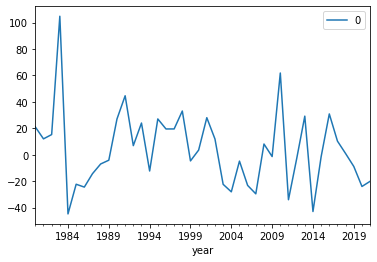

In [3]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

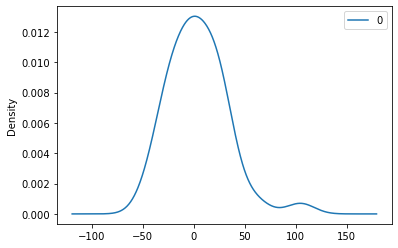

In [4]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [5]:

# summary stats of residuals
print(residuals.describe())

                0
count   42.000000
mean     3.839852
std     28.871566
min    -44.756587
25%    -18.642312
50%     -0.258202
75%     20.628125
max    104.739843


In [ ]:
# Load the data

year
1980-01-01     21
1981-01-01     33
1982-01-01     44
1983-01-01    140
1984-01-01     35
Name: cases, dtype: int64


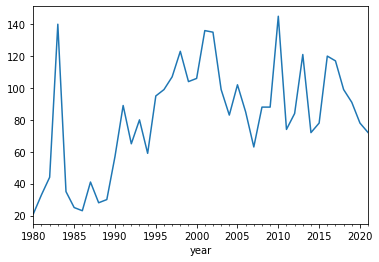

In [22]:
from pandas import read_csv
from matplotlib import pyplot
from datetime import datetime

series = read_csv('belize_tb_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

In [ ]:
# Split the data into a training set and a testing set

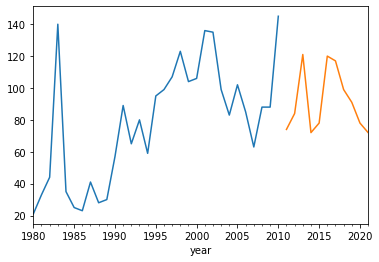

In [23]:
# Split the data into a train and test set
series_train = series.loc[:'2010']
series_test = series.loc['2011':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
series_train.plot(ax=ax)
series_test.plot(ax=ax)
plt.show()

In [ ]:
# Run the Augmented Dicky Fuller Test

In [24]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(series)

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.8260114425483547
0.0026521188359253825
{'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}


In [17]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(series_train)

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-2.6485275168310616
0.08337653731121292
{'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}


In [18]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(series_test)

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-5.398171235018113
3.417290329662354e-06
{'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}


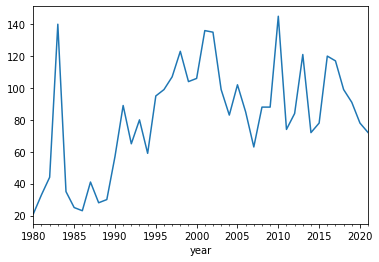

ADF Statistic: -3.8260114425483547
p-value: 0.0026521188359253825


In [20]:
# Run the ADF test on the time series
result = adfuller(series)

# Plot the time series
fig, ax = plt.subplots()
series.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

In [ ]:
# Differentiate the time series

In [21]:
# Calculate the first difference and drop the nans
series_diff = series.diff()
series_diff = series_diff.dropna()

# Run test and print
result_diff = adfuller(series_diff)
print(result_diff)

(-6.792440429022591, 2.346058670320354e-09, 1, 39, {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}, 279.24137208885907)


In [27]:
# Random data generation example

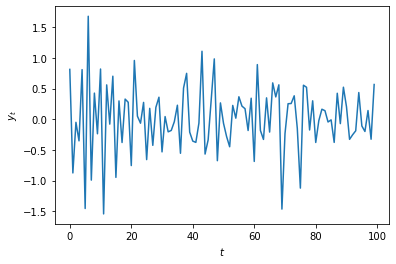

In [26]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
import numpy as np
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

In [28]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(series, order=(1,0,1))

# Fit the model
results = model.fit()

C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [29]:
# Instantiate the model
model = ARIMA(series, order=(2,0,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  cases   No. Observations:                   42
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -200.798
Date:                Tue, 16 Jan 2024   AIC                            409.595
Time:                        17:09:12   BIC                            416.546
Sample:                    01-01-1980   HQIC                           412.143
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.0756     10.754      7.353      0.000      57.999     100.153
ar.L1          0.4571      0.134      3.410      0.001       0.194       0.720
ar.L2          0.1398      0.146      0.958      0.3

C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [30]:
# Instantiate the model
model = ARIMA(series, order=(3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  cases   No. Observations:                   42
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -199.673
Date:                Tue, 16 Jan 2024   AIC                            411.346
Time:                        17:14:31   BIC                            421.773
Sample:                    01-01-1980   HQIC                           415.168
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.7043     15.285      5.018      0.000      46.746     106.663
ar.L1          0.9178      0.533      1.723      0.085      -0.126       1.962
ar.L2         -0.1700      0.336     -0.506      0.6

C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [ ]:
# Instantiate the model
model = ARIMA(hospital['wait_times_hrs'], order=(2,0,1), 
             exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

In [41]:

# fit model
model = ARIMA(series, order=(5,1,0))
results = model_fit = model.fit()


# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  cases   No. Observations:                   42
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -195.886
Date:                Tue, 16 Jan 2024   AIC                            403.772
Time:                        19:07:01   BIC                            414.053
Sample:                    01-01-1980   HQIC                           407.516
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5510      0.160     -3.437      0.001      -0.865      -0.237
ar.L2         -0.4545      0.261     -1.741      0.082      -0.966       0.057
ar.L3         -0.3073      0.274     -1.123      0.2

C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-3)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

In [44]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-3)


In [45]:
print(one_step_forecast)

In [46]:
# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

In [47]:
print(mean_forecast)

2019-01-01     99.869662
2020-01-01    101.997090
2021-01-01     92.081413
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [48]:
# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

In [49]:
print(confidence_intervals)

            lower cases  upper cases
2019-01-01    43.908950   155.830375
2020-01-01    46.036378   157.957802
2021-01-01    36.120700   148.042125


In [51]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower cases']

In [52]:
print(lower_limits)

2019-01-01    43.908950
2020-01-01    46.036378
2021-01-01    36.120700
Freq: AS-JAN, Name: lower cases, dtype: float64


In [53]:
upper_limits = confidence_intervals.loc[:,'upper cases']

In [54]:
print(upper_limits)

2019-01-01    155.830375
2020-01-01    157.957802
2021-01-01    148.042125
Freq: AS-JAN, Name: upper cases, dtype: float64


In [55]:
# Print best estimate predictions
print(mean_forecast)

2019-01-01     99.869662
2020-01-01    101.997090
2021-01-01     92.081413
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [57]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-3)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower cases']
upper_limits = confidence_intervals.loc[:,'upper cases']

# Print best estimate predictions
print(mean_forecast)

2019-01-01     99.869662
2020-01-01    101.997090
2021-01-01     92.081413
Freq: AS-JAN, Name: predicted_mean, dtype: float64


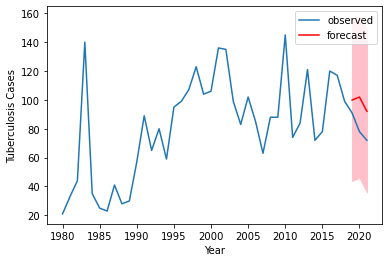

In [59]:
# plot the amazon data
plt.plot(series.index, series, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Year')
plt.ylabel('Tuberculosis Cases')
plt.legend()
plt.show()

In [60]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-10, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower cases']
upper_limits = confidence_intervals.loc[:,'upper cases']

# Print best estimate predictions
print(mean_forecast)

2012-01-01     87.185673
2013-01-01     93.239312
2014-01-01    102.785426
2015-01-01     91.127318
2016-01-01     94.735596
2017-01-01     94.044347
2018-01-01     95.528331
2019-01-01     93.971764
2020-01-01     94.848420
2021-01-01     94.445881
Freq: AS-JAN, Name: predicted_mean, dtype: float64


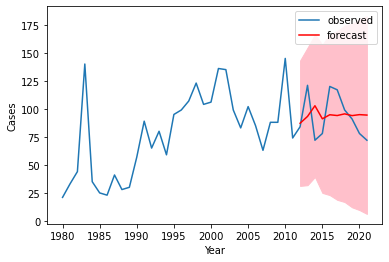

In [61]:
# plot the amazon data
plt.plot(series.index, series, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Year')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [66]:
# Take the first difference of the data
series_diff = series.diff().dropna()

# Create ARMA(2,2) model
arma = ARIMA(series_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  cases   No. Observations:                   41
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -195.661
Date:                Tue, 16 Jan 2024   AIC                            403.322
Time:                        20:53:08   BIC                            413.604
Sample:                    01-01-1981   HQIC                           407.066
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3935      1.130      1.233      0.217      -0.821       3.608
ar.L1         -0.5020      0.485     -1.035      0.301      -1.453       0.449
ar.L2          0.3795      0.205      1.851      0.0

C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [68]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + series.iloc[-1]

# Print forecast
print(arma_value_forecast)

2022-01-01     95.965995
2023-01-01    105.302871
2024-01-01    111.276008
2025-01-01    113.385385
2026-01-01    116.157645
2027-01-01    117.130704
2028-01-01    119.258525
2029-01-01    120.123807
2030-01-01    122.061141
2031-01-01    122.981140
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [69]:
# Create ARIMA(2,1,2) model
arima = ARIMA(series, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

2022-01-01    85.582529
2023-01-01    87.662223
2024-01-01    86.166866
2025-01-01    85.569626
2026-01-01    85.659480
2027-01-01    85.762044
2028-01-01    85.770183
2029-01-01    85.757356
2030-01-01    85.753602
2031-01-01    85.754651
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


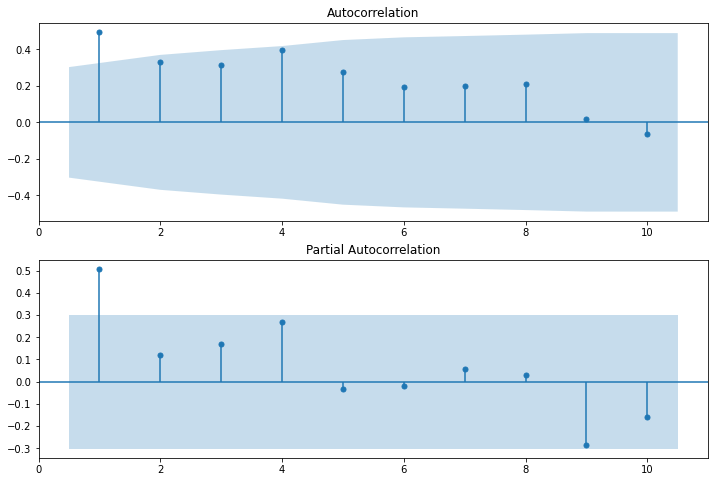

In [70]:
# Import
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df
plot_acf(series, lags=10, zero=False, ax=ax1)

# Plot the PACF of df
plot_pacf(series, lags=10, zero=False, ax=ax2)

plt.show()

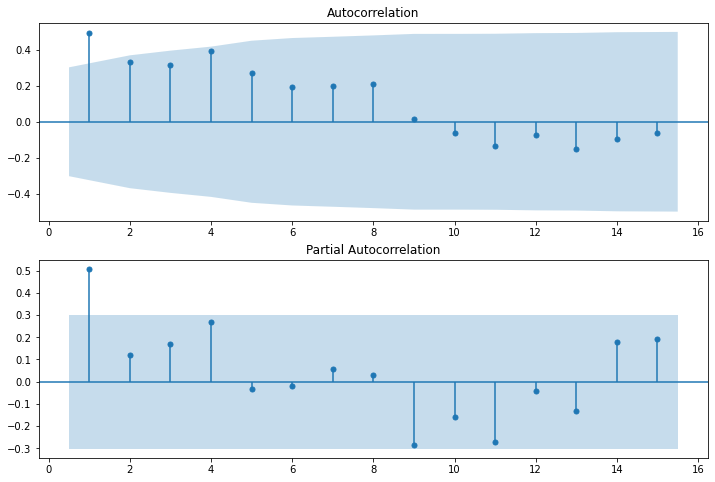

In [73]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(series, lags=15, zero=False, ax=ax1)
plot_pacf(series, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

In [76]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-2
for p in range(3):
  # Loop over q values from 0-2
    for q in range(3):
      	# create and fit ARMA(p,q) model
        model = ARIMA(series, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))
        
print(order_aic_bic)

C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

[(0, 0, 419.07651959598894, 422.5518588325557), (0, 1, 412.1158478074876, 417.3288566623377), (0, 2, 411.91930080373675, 418.8699792768702), (1, 0, 408.38865397734696, 413.60166283219706), (1, 1, 408.1641856204226, 415.11486409355604), (1, 2, 409.6816518143419, 418.36999990575873), (2, 0, 409.59508270698325, 416.5457611801167), (2, 1, 409.81118741791823, 418.4995355093351), (2, 2, 411.6196947032396, 422.0457124129398)]


C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [78]:
import pandas as pd

# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
4  1  1  408.164186  415.114864
3  1  0  408.388654  413.601663
6  2  0  409.595083  416.545761
5  1  2  409.681652  418.370000
7  2  1  409.811187  418.499536
8  2  2  411.619695  422.045712
2  0  2  411.919301  418.869979
1  0  1  412.115848  417.328857
0  0  0  419.076520  422.551859
   p  q         AIC         BIC
3  1  0  408.388654  413.601663
4  1  1  408.164186  415.114864
6  2  0  409.595083  416.545761
1  0  1  412.115848  417.328857
5  1  2  409.681652  418.370000
7  2  1  409.811187  418.499536
2  0  2  411.919301  418.869979
8  2  2  411.619695  422.045712
0  0  0  419.076520  422.551859


In [79]:
# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
      
        try:
            # create and fit ARMA(p,q) model
            model = ARIMA(series, order=(p,0,q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)      

C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

0 0 419.07651959598894 422.5518588325557
0 1 412.1158478074876 417.3288566623377
0 2 411.91930080373675 418.8699792768702
1 0 408.38865397734696 413.60166283219706
1 1 408.1641856204226 415.11486409355604
1 2 409.6816518143419 418.36999990575873
2 0 409.59508270698325 416.5457611801167


C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

2 1 409.81118741791823 418.4995355093351
2 2 411.6196947032396 422.0457124129398


C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\ruben\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
